In [6]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [7]:
titles = pd.read_csv('../data/fashion_youtube_titles.csv')

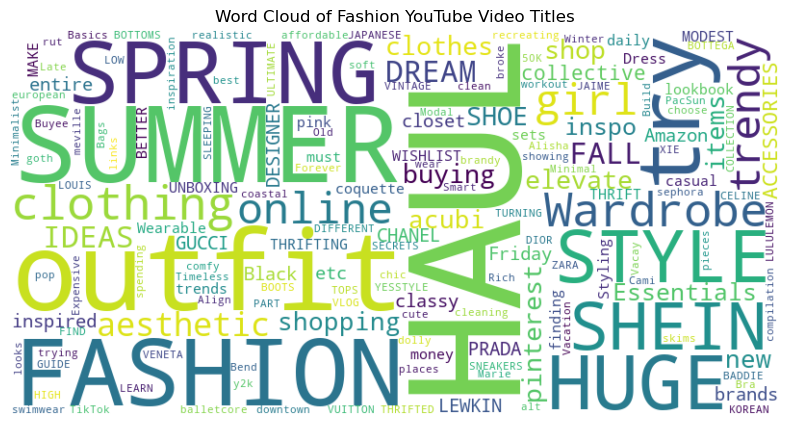

In [11]:
# combine titles into single string for word cloud
combined_titles = ' '.join(titles['Title'].astype(str).tolist())
# remove non-words, single character words, two character words
words = [word for word in re.findall(r'\b\w+\b', combined_titles)\
         if len(word) > 2]

# word cloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      collocations=False).generate(' '.join(words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Fashion YouTube Video Titles')
plt.show()

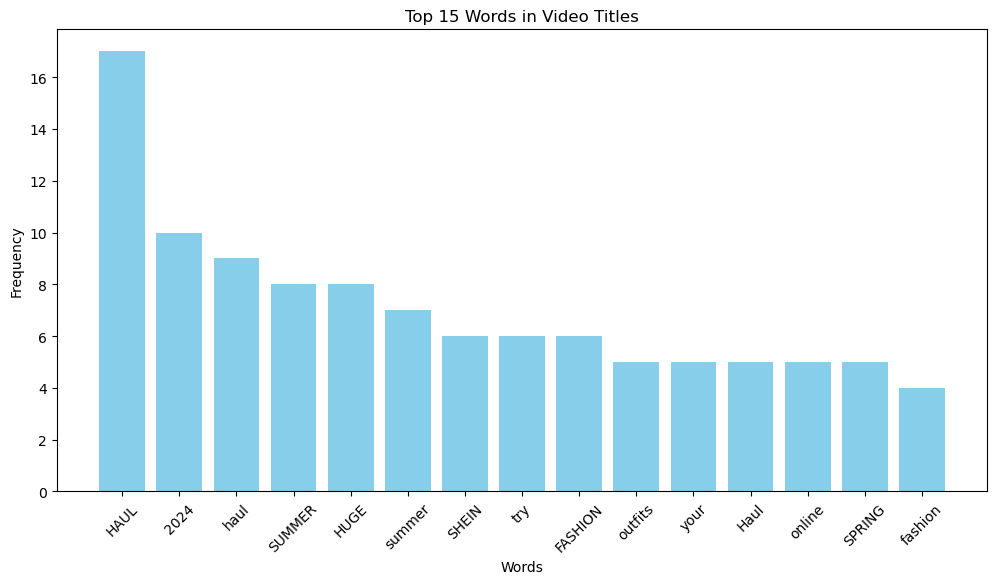

In [12]:
# histogram of frequency of top 15 words
word_counts = Counter(words)
top_15_words = word_counts.most_common(15)

# df for top 15 words
top_words_df = pd.DataFrame(top_15_words, columns=['keyword', 'frequency'])

plt.figure(figsize=(12, 6))
plt.bar(top_words_df['keyword'], top_words_df['frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Words in Video Titles')
plt.xticks(rotation=45)
plt.show()